### Writing an iterator to load data in chunks (1)

In [1]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('../Datasets/world_dev_ind.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

### Writing an iterator to load data in chunks(2)

In [2]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('../Datasets/ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


### Writing an iterator to load data in chunks (3)

In [3]:
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb = df_pop_ceb.copy()
df_pop_ceb['Total Urban Population'] = [int(x * (y / 100)) for x, y in pops_list]
df_pop_ceb.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total),Total Urban Population
2,Central Europe and the Baltics,CEB,1960,91401583.0,44.507921,40680944
244,Central Europe and the Baltics,CEB,1961,92237118.0,45.206665,41697325
486,Central Europe and the Baltics,CEB,1962,93014890.0,45.866565,42662734
728,Central Europe and the Baltics,CEB,1963,93845749.0,46.534093,43670267
970,Central Europe and the Baltics,CEB,1964,94722599.0,47.208743,44717348


<Axes: xlabel='Year', ylabel='Total Urban Population'>

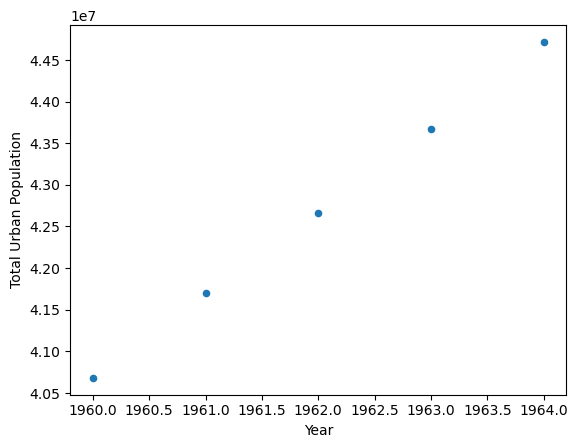

In [4]:
# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')

#### Writing an iterator to load data in chunks (4)

<Axes: xlabel='Year', ylabel='Total Urban Population'>

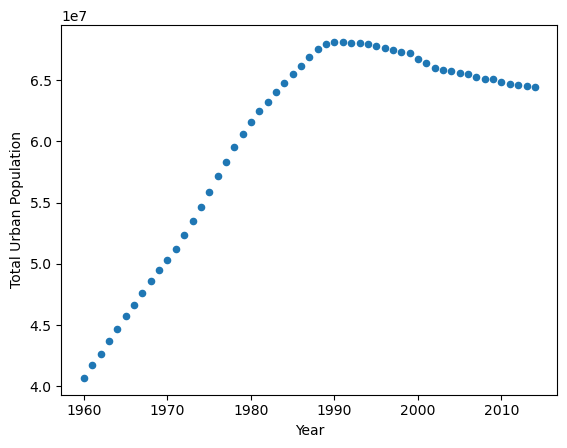

In [13]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('../Datasets/ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:
    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])
    # Turn zip object into list: pops_list
    pops_list = list(pops)
    # Use list comprehension to create new DataFrame colum 'Total Urban Population'
    df_pop_ceb = df_pop_ceb.copy()
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    # Concatenate DataFrame chunk to the end of data: data
    data = pd.concat([data, df_pop_ceb])
# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')

### Writing an iterator to load data in chunks (5)

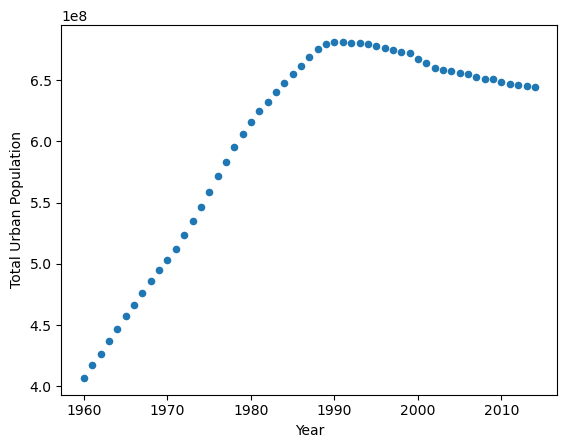

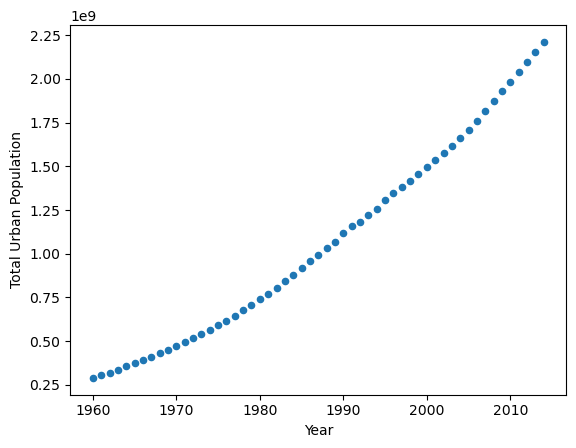

In [18]:
# Define plot_pop()
def plot_pop(filename, country_code):
    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)
    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    # Iterate over each DataFrame: data
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]
        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])
        # Turn zip object into list: pops_list
        pops_list = list(pops)
        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb = df_pop_ceb.copy()
        df_pop_ceb['Total Urban Population'] = [int(x * y * 0.1) for x, y in pops_list]
        # Concatenate DataFrame chunk to the end of data: data
        data = pd.concat([data, df_pop_ceb])
    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')

# Set the filename: fn
fn = '../Datasets/ind_pop_data.csv'
# Call plot_pop for country code 'CEB'
plot_pop(filename=fn, country_code='CEB')
# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')